#프로젝트 주제: 한국어 네이버 영화리뷰 감정분석  
#데이터: Naver sentiment movie corpus

# 1. 데이터 준비

In [1]:
!pip install gensim==4.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 91.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332360 sha256=8d0cead93a609f0ebca93c6dc936c76d2660267ce704997d06892e644bbfd431
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim


In [2]:
!pip install scipy==1.12.0 numpy==1.26.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", 

In [1]:
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

--2025-11-01 04:21:42--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.03s   

2025-11-01 04:21:43 (502 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]

--2025-11-01 04:21:43--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [application/octet-

In [2]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 50.9 MB/s eta 0:00:00
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 39.03 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2025-11-01 04:21:53--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 13.200.41.136, 13.200.41.134, 13.200.41.135, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.136|:443... connected.
HTTP request sent, awai

In [3]:
import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

2.2.2
0.6.0
4.3.2


In [4]:
import pandas as pd

train_data = pd.read_table("/content/ratings_train.txt")
test_data = pd.read_table("/content/ratings_test.txt")

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 2. 데이터로더 구성
- 데이터의 중복 제거
- NaN 결측치 제거
- 한국어 토크나이저로 토큰화
- 불용어(Stopwords) 제거
- 사전word_to_index 구성
- 텍스트 스트링을 사전 인덱스 스트링으로 변환
- X_train, y_train, X_test, y_test, word_to_index 리턴

In [5]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any')
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any')

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4) # 뒤에서 4개의 특수 토큰을 위한 공간을 확보하기 위해 -4

    # <PAD>=0, <UNK>=1, <BOS>=2, <EOS>=3 순서로 지정하고,
    # 그 뒤에 빈도수 상위 9,996개의 단어를 순서대로 추가
    vocab = ['<PAD>', '<UNK>', '<BOS>', '<EOS>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}  # 단어를 key로, 인덱스를 value로 갖는 사전을 만든다.

    # OOV 단어를 <UNK>의 인덱스(1)로 매핑
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

    # <PAD>, <UNK> 인덱스 확인
    print(f"PAD 인덱스: {word_to_index['<PAD>']}")
    print(f"UNK 인덱스: {word_to_index['<UNK>']}")

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

PAD 인덱스: 0
UNK 인덱스: 1


In [6]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [7]:
# 문장 1개를 활용할 딕셔너리, tokenizer와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다.
def get_encoded_sentence(sentence, word_to_index, tokenizer): # 형태소 토큰화를 위해 tokenizer도 인자로 받기
    # split에서 morphs 형태소 토큰화로 수정
    tokens = tokenizer.morphs(sentence)
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in tokens]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index, tokenizer):
    return [get_encoded_sentence(sentence, word_to_index, tokenizer) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다.
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# 3. 모델 구성을 위한 데이터 분석 및 가공
- 데이터셋 내 문장 길이 분포
- 적절한 최대 문장 길이 지정
- torch.nn.utils.rnn.pad_sequence 을 활용한 패딩 추가

## 3.1. 적절한 최대 문장 길이를 지정하기 위해 데이터셋 문장 길이의 분포 확인

문장 길이 최대: 116
문장 길이 95% 분위수: 47.00


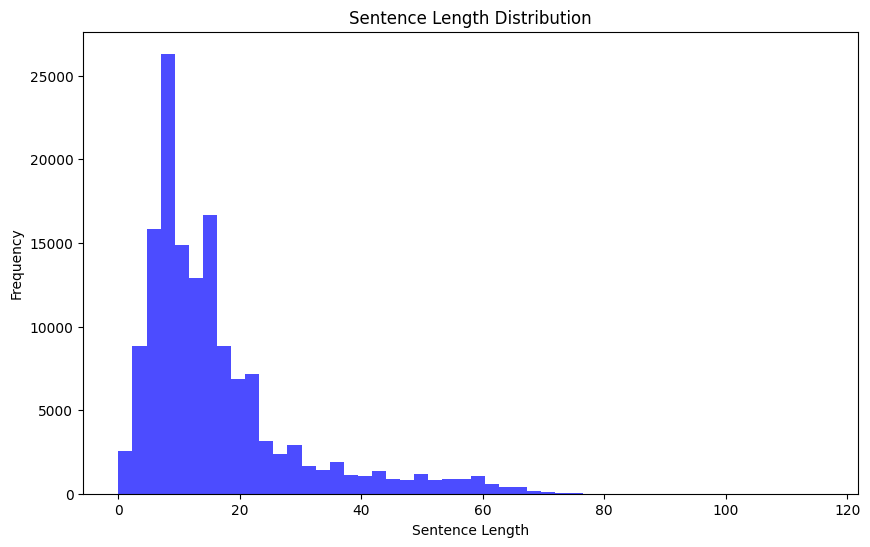

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 문장 길이 리스트 생성
train_lengths = [len(sentence) for sentence in X_train]

# 2. 통계치 확인
print(f"문장 길이 최대: {np.max(train_lengths)}")
print(f"문장 길이 95% 분위수: {np.percentile(train_lengths, 95):.2f}")

# 3. 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=50, alpha=0.7, color='blue')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

## 3.2. 적절한 최대 문장 길이 지정
최대 문장 길이가 너무 길면?  
- padding으로 채워지는 짧은 문장들이 너무 많아지게 되고, 비효율적이다.  

최대 문장 길이가 너무 짧으면?  
- 긴 문장의 정보를 잃는다.  

따라서 위에서 구한 95% 분위수 47로 결정한다.

In [9]:
max_len = 47

## 3.3. torch.nn.utils.rnn.pad_sequence 을 활용한 패딩 추가
한 값을 정해서 전체 데이터를 패딩하는 정적 패딩이 아닌, 배치를 나눠서 패딩하는 동적 패딩을 한다.  

1. 일단 모든 문장의 길이를 47 이내로 자른다.
2. 모든 문장 길이가 47인 상태로 배치를 나눈다.
3. 만약 특정 배치 내의 문장의 최대 길이가 47이라면 47을 최대로 잡고 패딩하고,
4. 최대 길이가 30이라면 30을 최대로 잡고 패딩하는 방식  

이렇게 하면 계산 효율이 좋아진다.


In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

# 1. PyTorch Dataset 클래스 정의
# (X_train, y_train을 묶어주는 역할)
class NsmcDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # 데이터를 파이썬 리스트 상태로 반환
        return self.sequences[idx], self.labels[idx]

# 2. collate_fn (배치 처리 함수) 정의
def collate_fn(batch):
    text_list, label_list = [], []

    for (_text, _label) in batch:
        label_list.append(_label)

        # 1. 자르기
        # max_len (47)보다 긴 문장은 뒷부분을 자른다.
        truncated_text = _text[ :max_len]
        text_list.append(torch.tensor(truncated_text, dtype=torch.int64))

    # 2. Dynamic Padding (동적 패딩)
    # 64개(배치 크기)의 텐서 리스트를 받아,
    # 이 배치에서 가장 긴 문장을 기준으로 <PAD> 토큰(0)을 채운다.
    padded_texts = pad_sequence(text_list,
                                batch_first=True,
                                padding_value=0)

    labels = torch.tensor(label_list, dtype=torch.int64)
    return padded_texts, labels

# 3. DataLoader 생성
batch_size = 64

train_dataset = NsmcDataset(X_train, y_train)
test_dataset = NsmcDataset(X_test, y_test)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          # 배치로 묶는 커스텀 함수를 입력하터 collate_fn에 위의 함수 입력
                          collate_fn=collate_fn,
                          num_workers=4,
                          pin_memory=True)

test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=False,
                         collate_fn=collate_fn)

# 4. (확인용) 잘 작동하는지 첫 번째 배치를 출력
print("--- 동적 패딩 확인 (첫 번째 배치) ---")
for texts, labels in train_loader:
    print("Texts shape:", texts.shape)
    print("Labels shape:", labels.shape)
    print("첫 번째 문장 (패딩됨):", texts[0])
    break

--- 동적 패딩 확인 (첫 번째 배치) ---


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Texts shape: torch.Size([64, 47])
Labels shape: torch.Size([64])
첫 번째 문장 (패딩됨): tensor([ 176,  365,  341,    8,    6,    4,    1,    7, 1233,   31,  253, 4222,
          12,    1,   13, 3159,  125, 6196,  264,  531,    4,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])


# 4. validation set 구성 및 모델 구성

## 4.1. validation set 구성

In [11]:
from torch.utils.data import random_split

# 1. 훈련/검증 데이터셋 비율 8:2.
total_train_size = len(train_dataset)
valid_size = int(total_train_size * 0.2)
train_size = total_train_size - valid_size

# 2. random_split으로 데이터셋을 분리한다.
train_subset, valid_subset = random_split(train_dataset, [train_size, valid_size])

print(f"총 훈련 데이터: {total_train_size}개")
print(f"분리된 훈련 데이터: {len(train_subset)}개")
print(f"분리된 검증 데이터: {len(valid_subset)}개")

# 4. 새로운 DataLoader를 생성. (collate_fn은 동일하게 사용)
batch_size = 64

train_loader = DataLoader(train_subset,
                          batch_size=batch_size,
                          shuffle=True,
                          collate_fn=collate_fn,
                          num_workers=4,
                          pin_memory=True)

valid_loader = DataLoader(valid_subset,
                          batch_size=batch_size,
                          shuffle=False, # 검증 데이터는 섞을 필요 없음
                          collate_fn=collate_fn,
                          num_workers=4,
                          pin_memory=True)

총 훈련 데이터: 146182개
분리된 훈련 데이터: 116946개
분리된 검증 데이터: 29236개


## 4.2. 모델 구성

In [12]:
# 모델을 비교하기 위해서는 동일한 파라미터를 사용해야 함
import torch.nn as nn
import torch.nn.functional as F

# 공통 하이퍼파라미터 정의
VOCAB_SIZE = len(word_to_index)    # 단어 사전의 크기
EMBEDDING_DIM = 100                # 임베딩 벡터의 차원
HIDDEN_DIM = 128                   # RNN/LSTM의 은닉 상태 차원
OUTPUT_DIM = 1                     # 출력 차원 (긍정=1, 부정=0 -> 1개)
N_LAYERS = 2                       # RNN/LSTM 레이어 개수
BIDIRECTIONAL = True               # 양방향 RNN/LSTM 여부
DROPOUT_RATE = 0.5                 # 드롭아웃 비율
PAD_IDX = 0                        # 패딩 인덱스 (0)

### 4.2.1. 기본 RNN

In [13]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):
        super().__init__()

        # 1. 임베딩 레이어
        # padding_idx: PAD 토큰은 학습 중에 무시하도록 설정
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        # 2. RNN 레이어
        self.rnn = nn.RNN(input_size=embedding_dim,
                          hidden_size=hidden_dim,
                          num_layers=n_layers,
                          bidirectional=bidirectional,
                          batch_first=True,
                          dropout=dropout)

        # 3. FC 레이어
        fc_input_dim = hidden_dim * 2  # 양방향이므로
        self.fc = nn.Linear(fc_input_dim, output_dim)

        # 4. 드롭아웃
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        # 1. 임베딩
        embedded = self.embedding(text)

        # 2. RNN
        _output, hidden = self.rnn(embedded)

        # 3. 마지막 레이어의 은닉 상태 결합 (양방향 처리)
        if self.rnn.bidirectional:
            # (마지막 정방향, 마지막 역방향) 은닉 상태를 결합
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        # 4. FC 레이어 통과
        prediction = self.fc(hidden)

        return prediction.squeeze(1)

### 4.2.2. LSTM

In [14]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):
        super().__init__()

        # 1. 임베딩 레이어
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        # 2. LSTM 레이어
        self.lstm = nn.LSTM(input_size=embedding_dim,
                           hidden_size=hidden_dim,
                           num_layers=n_layers,
                           bidirectional=bidirectional,
                           batch_first=True,
                           dropout=dropout)

        # 3. FC 레이어
        fc_input_dim = hidden_dim * 2
        self.fc = nn.Linear(fc_input_dim, output_dim)

        # 4. 드롭아웃
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        embedded = self.embedding(text)

        # 2. LSTM
        _output, (hidden, cell) = self.lstm(embedded)

        # 3. 마지막 레이어의 은닉 상태 결합 (양방향 처리)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        # 4. FC 레이어 통과
        prediction = self.fc(hidden)

        return prediction.squeeze(1)

### 4.2.3. 1D CNN

In [15]:
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim,
                 dropout, pad_idx):
        super().__init__()

        # 1. 임베딩 레이어
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        # 2. 1D Convolution 레이어들 (다른 커널 크기를 사용)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim,
                      out_channels=n_filters,
                      kernel_size=k) # n-gram 크기
            for k in filter_sizes
        ])

        # 3. FC 레이어
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)

        # 4. 드롭아웃
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        # 1. 임베딩
        embedded = self.embedding(text)

        # 2. Conv1d를 위한 차원 변경
        embedded = embedded.permute(0, 2, 1)

        # 3. Convolution + ReLU + Max Pooling
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

        # 4. 모든 풀링 결과를 결합
        cat = self.dropout(torch.cat(pooled, dim=1))

        # 5. FC 레이어 통과
        prediction = self.fc(cat)

        return prediction.squeeze(1)

# 5. 모델 학습

## 5.1. 함수 정의

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

# 0. GPU 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 1. 헬퍼 함수 정의
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

# 2. 훈련 함수 정의
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for texts, labels in iterator:
        texts = texts.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        predictions = model(texts)
        loss = criterion(predictions, labels.float())
        acc = binary_accuracy(predictions, labels)
        loss.backward()
        # 실험 결과 기울기 폭주 발생
        # 그러므로 기울기의 최대 크기를 1.0으로 제한
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# 3. 평가 함수 정의
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for texts, labels in iterator:
            texts = texts.to(device)
            labels = labels.to(device)
            predictions = model(texts)
            loss = criterion(predictions, labels.float())
            acc = binary_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Using device: cuda


## 5.2. 모델 학습

In [20]:
# CNN 파라미터
N_FILTERS = 100
FILTER_SIZES = [3, 4, 5]

# 모델 설정
models_config = {
    'RNN': {
        'model': RNNModel(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT_RATE, PAD_IDX),
        'save_path': 'best_model_rnn.pt',
        'train_losses': [],
        'train_accs': [],
        'valid_losses': [],
        'valid_accs': []
    },
    'LSTM': {
        'model': LSTMModel(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                          N_LAYERS, BIDIRECTIONAL, DROPOUT_RATE, PAD_IDX),
        'save_path': 'best_model_lstm.pt',
        'train_losses': [],
        'train_accs': [],
        'valid_losses': [],
        'valid_accs': []
    },
    'CNN': {
        'model': CNNModel(VOCAB_SIZE, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES,
                         OUTPUT_DIM, DROPOUT_RATE, PAD_IDX),
        'save_path': 'best_model_cnn.pt',
        'train_losses': [],
        'train_accs': [],
        'valid_losses': [],
        'valid_accs': []
    }
}

# 공통 학습 설정
N_EPOCHS = 30
patience = 5
criterion = nn.BCEWithLogitsLoss().to(device)

# 각 모델별 학습
for model_name, config in models_config.items():
    print(f"\n{'='*60}")
    print(f"--- {model_name} Model Training starts ---")
    print(f"{'='*60}\n")

    # 모델 및 옵티마이저 설정
    model = config['model'].to(device)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

    # Early stopping 초기화
    patience_counter = 0
    best_valid_loss = float('inf')

    # 학습 루프
    for epoch in range(N_EPOCHS):
        start_time = time.time()

        # 학습
        train_loss, train_acc = train(model, train_loader, optimizer, criterion)

        # 검증
        valid_loss, valid_acc = evaluate(model, valid_loader, criterion)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

        # 결과 저장
        config['train_losses'].append(train_loss)
        config['train_accs'].append(train_acc)
        config['valid_losses'].append(valid_loss)
        config['valid_accs'].append(valid_acc)

        # 조기 종료 로직
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), config['save_path'])
            patience_counter = 0
            print(f'\t>> Validation loss improved ({best_valid_loss:.3f}). Saving model...')
        else:
            patience_counter += 1
            print(f'\t>> Validation loss did not improve. Counter: {patience_counter}/{patience}')

            if patience_counter >= patience:
                print(f'--- Early stopping triggered after {epoch+1} epochs ---')
                break

    # 테스트 평가
    print(f"\n--- Loading best {model_name} model for test evaluation ---")
    model.load_state_dict(torch.load(config['save_path']))
    test_loss, test_acc = evaluate(model, test_loader, criterion)

    print(f"\n--- {model_name} Model Test Results (Best Model) ---")
    print(f'\tTest Loss: {test_loss:.3f}')
    print(f'\tTest Acc:  {test_acc*100:.2f}%')

    # 결과를 config에 저장
    config['test_loss'] = test_loss
    config['test_acc'] = test_acc


--- RNN Model Training starts ---

Epoch: 01 | Epoch Time: 0m 11s
	Train Loss: 0.623 | Train Acc: 64.49%
	 Val. Loss: 0.577 |  Val. Acc: 69.97%
	>> Validation loss improved (0.577). Saving model...
Epoch: 02 | Epoch Time: 0m 11s
	Train Loss: 0.534 | Train Acc: 73.47%
	 Val. Loss: 0.552 |  Val. Acc: 73.32%
	>> Validation loss improved (0.552). Saving model...
Epoch: 03 | Epoch Time: 0m 11s
	Train Loss: 0.486 | Train Acc: 76.85%
	 Val. Loss: 0.480 |  Val. Acc: 78.18%
	>> Validation loss improved (0.480). Saving model...
Epoch: 04 | Epoch Time: 0m 11s
	Train Loss: 0.454 | Train Acc: 78.97%
	 Val. Loss: 0.471 |  Val. Acc: 79.39%
	>> Validation loss improved (0.471). Saving model...
Epoch: 05 | Epoch Time: 0m 11s
	Train Loss: 0.432 | Train Acc: 80.45%
	 Val. Loss: 0.437 |  Val. Acc: 80.41%
	>> Validation loss improved (0.437). Saving model...
Epoch: 06 | Epoch Time: 0m 11s
	Train Loss: 0.421 | Train Acc: 81.37%
	 Val. Loss: 0.435 |  Val. Acc: 81.08%
	>> Validation loss improved (0.435). Sa

RNN:
- Test Loss: 0.374
- Test Acc:  83.91%

LSTM:  
- Test Loss: 0.361
- Test Acc:  84.17%

CNN:
- Test Loss: 0.351
- Test Acc:  85.21%


# 6. Word2Vec 임베딩 모델 적용

## 6.1. Word2Vec 모델 로드 및 임베딩 행렬 생성

In [29]:
import gensim
import torch
import numpy as np

# --- 1. Word2Vec 모델 로드 ---
print("Word2Vec 파일을 로드 중입니다...")
w2v_path = '/content/word2vec_ko.model'

# .model 파일은 Word2Vec.load()로 로드
full_w2v_model = gensim.models.Word2Vec.load(w2v_path)

#  .model 파일은 전체 모델이므로, 벡터 정보(KeyedVectors)만 .wv로 추출
w2v_model = full_w2v_model.wv
print("Word2Vec 모델 로드 완료.")


# --- 2. 임베딩 차원 확인 및 설정 ---
w2v_dim = w2v_model.vector_size
print(f"로드된 Word2Vec 차원: {w2v_dim}")

if EMBEDDING_DIM != w2v_dim:
    print(f"경고: 노트북의 EMBEDDING_DIM({EMBEDDING_DIM})과 W2V 차원({w2v_dim})이 다릅니다.")

Word2Vec 파일을 로드 중입니다...
Word2Vec 모델 로드 완료.
로드된 Word2Vec 차원: 100


In [32]:
# --- 3. 임베딩 행렬(가중치) 생성 ---
embedding_matrix = torch.zeros((VOCAB_SIZE, EMBEDDING_DIM))

oov_count = 0
print(f"사전 크기({VOCAB_SIZE}) 기준으로 임베딩 행렬을 생성합니다.")

for word, index in word_to_index.items():
    try:
        # Word2Vec 모델에서 단어 벡터 가져오기
        embedding_vector = w2v_model[word]
        embedding_matrix[index] = torch.tensor(embedding_vector, dtype=torch.float32)
    except KeyError:
        # 0OV (Out-of-Vocabulary): Word2Vec에 없는 단어
        oov_count += 1
        if word == '<PAD>':
            # <PAD> 토큰은 0 벡터로 유지
            embedding_matrix[index] = torch.zeros(EMBEDDING_DIM)
        else:
            # <UNK> 및 기타 OOV 단어는 랜덤 초기화 (N(0, 1))
            embedding_matrix[index] = torch.randn(EMBEDDING_DIM)

print(f"임베딩 행렬 생성 완료. (크기: {embedding_matrix.shape})")
print(f"OOV (사전학습 모델에 없는 단어) 개수: {oov_count} / {VOCAB_SIZE}")

사전 크기(10000) 기준으로 임베딩 행렬을 생성합니다.
임베딩 행렬 생성 완료. (크기: torch.Size([10000, 100]))
OOV (사전학습 모델에 없는 단어) 개수: 543 / 10000


## 6.2. 모델 학습

In [33]:
# CNN 파라미터
N_FILTERS = 100
FILTER_SIZES = [3, 4, 5]

# 모델 설정
models_config = {
    'RNN': {
        'model': RNNModel(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                         N_LAYERS, BIDIRECTIONAL, DROPOUT_RATE, PAD_IDX),
        'save_path': 'best_model_rnn.pt',
        'train_losses': [],
        'train_accs': [],
        'valid_losses': [],
        'valid_accs': []
    },
    'LSTM': {
        'model': LSTMModel(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM,
                          N_LAYERS, BIDIRECTIONAL, DROPOUT_RATE, PAD_IDX),
        'save_path': 'best_model_lstm.pt',
        'train_losses': [],
        'train_accs': [],
        'valid_losses': [],
        'valid_accs': []
    },
    'CNN': {
        'model': CNNModel(VOCAB_SIZE, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES,
                         OUTPUT_DIM, DROPOUT_RATE, PAD_IDX),
        'save_path': 'best_model_cnn.pt',
        'train_losses': [],
        'train_accs': [],
        'valid_losses': [],
        'valid_accs': []
    }
}

# 공통 학습 설정
N_EPOCHS = 30
patience = 5
criterion = nn.BCEWithLogitsLoss().to(device)

# 각 모델별 학습
for model_name, config in models_config.items():
    print(f"\n{'='*60}")
    print(f"--- {model_name} Model Training starts ---")
    print(f"{'='*60}\n")

    # Word2Vec 가중치 적용
    config['model'].embedding.weight.data.copy_(embedding_matrix)

    # 모델 및 옵티마이저 설정
    model = config['model'].to(device)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

    # Early stopping 초기화
    patience_counter = 0
    best_valid_loss = float('inf')

    # 학습 루프
    for epoch in range(N_EPOCHS):
        start_time = time.time()

        # 학습
        train_loss, train_acc = train(model, train_loader, optimizer, criterion)

        # 검증
        valid_loss, valid_acc = evaluate(model, valid_loader, criterion)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

        # 결과 저장
        config['train_losses'].append(train_loss)
        config['train_accs'].append(train_acc)
        config['valid_losses'].append(valid_loss)
        config['valid_accs'].append(valid_acc)

        # 조기 종료 로직
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), config['save_path'])
            patience_counter = 0
            print(f'\t>> Validation loss improved ({best_valid_loss:.3f}). Saving model...')
        else:
            patience_counter += 1
            print(f'\t>> Validation loss did not improve. Counter: {patience_counter}/{patience}')

            if patience_counter >= patience:
                print(f'--- Early stopping triggered after {epoch+1} epochs ---')
                break

    # 테스트 평가
    print(f"\n--- Loading best {model_name} model for test evaluation ---")
    model.load_state_dict(torch.load(config['save_path']))
    test_loss, test_acc = evaluate(model, test_loader, criterion)

    print(f"\n--- {model_name} Model Test Results (Best Model) ---")
    print(f'\tTest Loss: {test_loss:.3f}')
    print(f'\tTest Acc:  {test_acc*100:.2f}%')

    # 결과를 config에 저장
    config['test_loss'] = test_loss
    config['test_acc'] = test_acc


--- RNN Model Training starts ---



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 01 | Epoch Time: 0m 12s
	Train Loss: 0.604 | Train Acc: 66.71%
	 Val. Loss: 0.557 |  Val. Acc: 73.47%
	>> Validation loss improved (0.557). Saving model...
Epoch: 02 | Epoch Time: 0m 12s
	Train Loss: 0.519 | Train Acc: 75.18%
	 Val. Loss: 0.511 |  Val. Acc: 75.96%
	>> Validation loss improved (0.511). Saving model...
Epoch: 03 | Epoch Time: 0m 12s
	Train Loss: 0.485 | Train Acc: 77.44%
	 Val. Loss: 0.484 |  Val. Acc: 77.68%
	>> Validation loss improved (0.484). Saving model...
Epoch: 04 | Epoch Time: 0m 12s
	Train Loss: 0.459 | Train Acc: 79.10%
	 Val. Loss: 0.447 |  Val. Acc: 79.85%
	>> Validation loss improved (0.447). Saving model...
Epoch: 05 | Epoch Time: 0m 12s
	Train Loss: 0.436 | Train Acc: 80.33%
	 Val. Loss: 0.476 |  Val. Acc: 77.28%
	>> Validation loss did not improve. Counter: 1/5
Epoch: 06 | Epoch Time: 0m 12s
	Train Loss: 0.420 | Train Acc: 81.14%
	 Val. Loss: 0.431 |  Val. Acc: 80.46%
	>> Validation loss improved (0.431). Saving model...
Epoch: 07 | Epoch Time: 0m

In [37]:
print(f"RNN Test Accuarcy: {models_config['RNN']['test_acc']*100:.2f}%")
print(f"LSTM Test Accuarcy: {models_config['LSTM']['test_acc']*100:.2f}%")
print(f"CNN Test Accuarcy: {models_config['CNN']['test_acc']*100:.2f}%")

RNN Test Accuarcy: 84.64%
LSTM Test Accuarcy: 85.00%
CNN Test Accuarcy: 85.64%


## 8.3. Loss, Accuracy 시각화

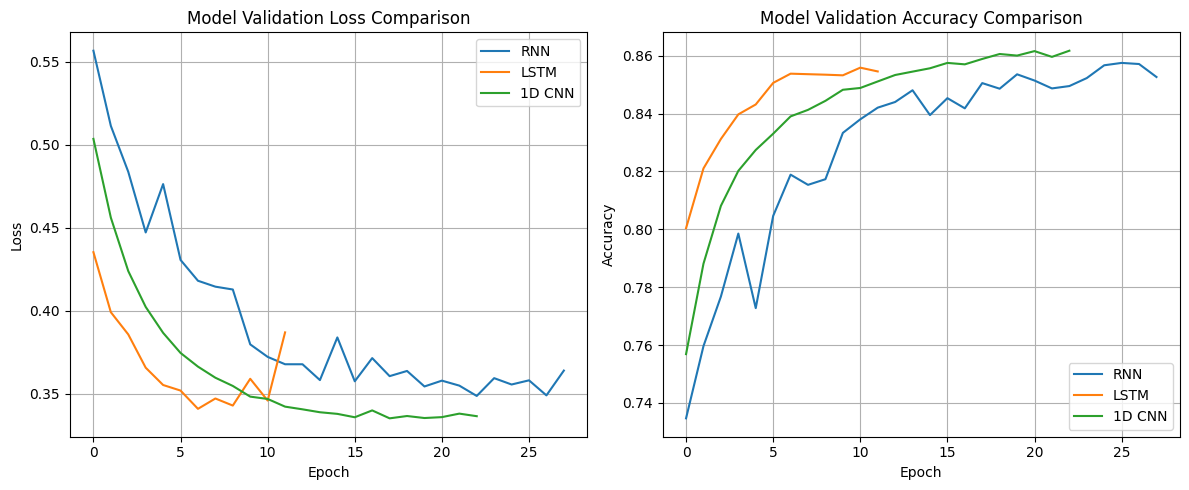

In [38]:
import matplotlib.pyplot as plt

# 1. 그래프 크기 설정
plt.figure(figsize=(12, 5))

# 2. Validation Loss 비교 그래프
plt.subplot(1, 2, 1)
plt.plot(models_config['RNN']["valid_losses"], label='RNN')
plt.plot(models_config['LSTM']["valid_losses"], label='LSTM')
plt.plot(models_config['CNN']["valid_losses"], label='1D CNN')
plt.title('Model Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 3. Validation Accuracy 비교 그래프
plt.subplot(1, 2, 2)
plt.plot(models_config['RNN']["valid_accs"], label='RNN')
plt.plot(models_config['LSTM']["valid_accs"], label='LSTM')
plt.plot(models_config['CNN']["valid_accs"], label='1D CNN')
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 4. 그래프 출력
plt.tight_layout() # 그래프 간격 자동 조절
plt.show()

# 회고

## **10/27**  
### **Word2Vec 적용하지 않은 기본 임베딩**
1차 시도  
- 30 epoch를 했는데, 6 epoch 부터 기울기 폭주 발생 (validation loss가 0.8이 넘었음)
- 그래서 train 함수에 최대 기울기를 1로 지정하고 10 epoch로 다시 학습해봄  

2차 시도
- lstm의 경우 10 에폭에서 loss가 0.5까지 갔음
- 이번엔 lr=0.0001로 해서 다시 시도  

3차 시도
- lr을 낮췄더니 lstm 10 에폭에서 0.3 중반 loss가 나옴. 효과가 있었음. (1dcnn도 마찬가지)   

최종 결과:  
LSTM 모델의 정확도가 84%로 최고 성능을 달성했지만, 목표치인 85%는 넘기지 못 함.  
<br>
## **11/01**
### **Word2Vec 적용**
- Word2Vec 임베딩을 적용한 새로운 모델 학습
- 기존 모델들과 Word2Vec 임베딩을 적용한 모델들 모두 Early stop 기법 추가.  

<br>

| Model | Word2Vec 적용 여부 | Test Loss | Test Acc |
| :--- | :--- | :---: | :---: |
| RNN | 미적용 | 0.374 | 83.91% |
| RNN | 적용 | 0.354 | 84.64% |
| LSTM | 미적용 | 0.361 | 84.17% |
| LSTM | 적용 | 0.344 | 85.00% |
| 1D CNN | 미적용 | 0.351 | 85.21% |
| 1D CNN | 적용 | 0.337 | 85.64% |  

<br>

모델별 Accuracy 비교 결과 Word2Vec을 적용한 모델들의 정확도가 아주 근소하게 높은 것을 확인할 수 있었다.  
그 결과 LSTM과 1D CNN 모델은 Accuracy 목표치인 85%를 달성했다.  
<br>
1D CNN 모델의 경우 Word2Vec 적용 유무에 상관 없이 Accuracy 목표치 85% 이상을 달성했는데,  
Early Stop 적용의 효과인 것 같다.  
